In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('silvergolddata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Year           42 non-null     int64
 1   Gold Prices    42 non-null     int64
 2   Silver Prices  42 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


In [4]:
df.head()

,Year,Gold Prices,Silver Prices
0,1981,1800,2715
1,1982,1645,2720
2,1983,1800,3105
3,1984,1970,3570
4,1985,2130,3955


In [5]:
df['Silver Prices'] = df['Silver Prices'] / 10

In [6]:
years = list(df['Year']) * 2
prices = list(df['Gold Prices']) + list(df['Silver Prices'])
label = ['Gold'] * len(df) + ['Silver'] * len(df)
class_label = [0] * len(df) + [1] * len(df)

In [7]:
data = pd.DataFrame({'Year': years, 
                     'Prices': prices, 
                     'Label': label, 
                     'Class Label': class_label})

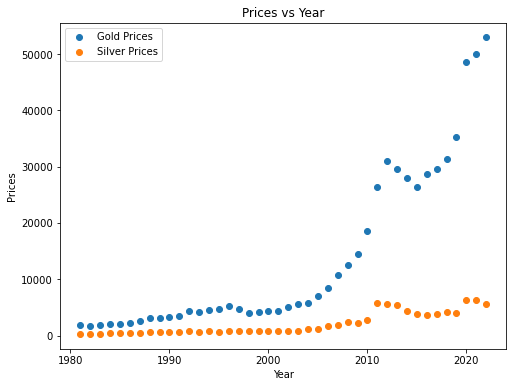

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Year'], df['Gold Prices'], label='Gold Prices')
plt.scatter(df['Year'], df['Silver Prices'], label='Silver Prices')
plt.xlabel('Year')
plt.ylabel('Prices')
plt.legend()
plt.title('Prices vs Year')
plt.show()

In [9]:
X, Y = data[['Year', 'Prices']].values, data['Class Label'].values

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train, Y_train)

LogisticRegression()

In [14]:
Y_pred = model.predict(X_test)

In [15]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

Confusion Matrix:
[[4 1]
 [4 8]]


In [16]:
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.89      0.67      0.76        12

    accuracy                           0.71        17
   macro avg       0.69      0.73      0.69        17
weighted avg       0.77      0.71      0.72        17



In [17]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1), np.arange(y_min, y_max, 1))
xxyy_test = np.c_[xx.ravel(), yy.ravel()]
xxyy_test = scaler.transform(xxyy_test)
Z = model.predict(xxyy_test)
Z = Z.reshape(xx.shape)

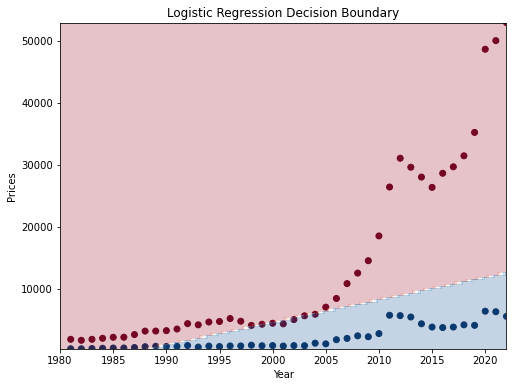

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdBu)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.25)
plt.xlabel('Year')
plt.ylabel('Prices')
plt.title('Logistic Regression Decision Boundary')
plt.show()